

<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## PGE 383 Graduate Student Project 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


____________________



## Bootstrap with Linear regression

#### Haojun Xia
#### Hildebrand Department of Petroleum and Geosystems Engineering, The University of Texas at Austin

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Lei Liu, Graduate Student, The University of Texas at Austin



Workflow name: Bootstrap with Linear Regression

Executive Summary:
In this workflow, we displayed how to conduct the bootstrap with linear regression. 

1. Dataset Overview
Description: Display the characteristics of the original dataset.
Show data distribution.
Calculate the mean values for each feature.
2. Linear Regression Analysis
Description: Perform an initial linear regression using the entire dataset.
Generate a linear regression model.
Compare the model's performance with the original dataset.
3. Bootstrap Method
Description: Implement bootstrap resampling for linear regression.
Utilize a dataset of 105 observations.
Randomly sample with replacement to create multiple datasets.
Build linear regression models for each bootstrap sample.
4. Comparison of Bootstrap Results
Description: Analyze and compare results from different bootstrap realizations.
Conduct multiple tests with varying numbers of bootstrap samples.
Compare slopes and intercepts of different bootstrap models.
Evaluate the consistency/stability of regression coefficients across bootstrapped models.
5. Conclusion:
Summarize the findings from the comparison of bootstrap models.
Highlight the impact of different bootstrap realizations on regression coefficients.
Discuss the reliability and variability observed in the bootstrapped linear regression models.

Load the required libraries
The following code loads the required libraries

In [1]:
import os                                                   # to set current working directory 
import numpy as np                                          # arrays and matrix math
import scipy.stats as st                                    # statistical methods
from sklearn.linear_model import LinearRegression           # scikit-learning multilinear regression
import pandas as pd                                         # DataFrames
import matplotlib.pyplot as plt                             # for plotting
plt.rc('axes', axisbelow=True)                              # set axes and grids in the background for all plots
import math                                                 # for square root
import statsmodels.formula.api as sm                        # for statistic
import seaborn as sns                                       # for plot 

Loading data
The following code loads the data.
The data comes from Dr. Pyrcz's subsurface machine learning class.
'Density_Por_data.csv' is available at https://github.com/GeostatsGuy/GeoDataSets. It is a comma delimited file with 105 porosity and density measures from a rock unit.
density ( 𝑔/𝑐𝑚3 )
porosity ( % )
We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it by printing a slice and by utilizing the 'head' DataFrame member function (with a nice and clean format, see below).

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/Density_Por_data.csv") # load data from Dr. Pyrcz's GitHub repository

Check the data
In this section, I display the distribution of the dataset.

In [3]:
df.head()               #display the top 5 row of the dataset

,Density,Porosity
0,1.281391,16.610982
1,1.404932,13.668073
2,2.346926,9.590092
3,1.348847,15.877907
4,2.331653,4.968240


In [4]:
df.describe().transpose()                                    # calculate summary statistics

,count,mean,std,min,25%,50%,75%,max
Density,105.0,1.737917,0.288278,0.996736,1.552713,1.748788,1.906634,2.410560
Porosity,105.0,12.531279,3.132269,4.966421,10.546483,12.411608,14.230930,20.964941


Display the data

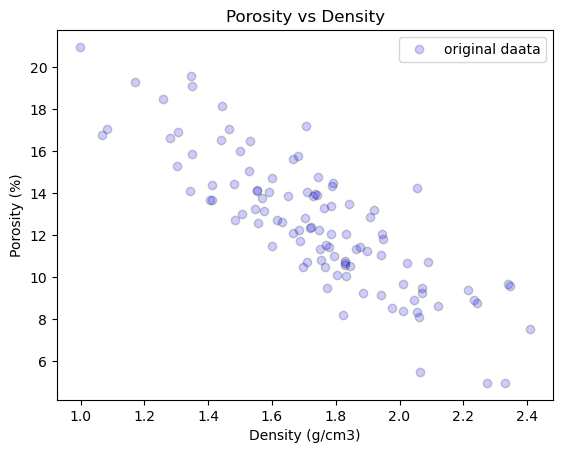

In [5]:
por = df['Porosity']
den = df['Density']

plt.plot(den, por, 'o', label='original daata', color = 'blue', alpha = 0.2, markeredgecolor = 'black')
plt.title('Porosity vs Density')
plt.xlabel('Density (g/cm3)')
plt.ylabel('Porosity (%)')
plt.legend()
plt.show()

Linear Regression
Doing linear regression using the original data as the training data

In [6]:
slope, intercept, r_value, p_value, std_err = st.linregress(den,por)

print('The model parameters are, slope (b1) = ' + str(round(slope,2)) + ', and the intercept (b0) = ' + str(round(intercept,2)))

The model parameters are, slope (b1) = -9.1, and the intercept (b0) = 28.35


Next, display the linear regression model with the original data

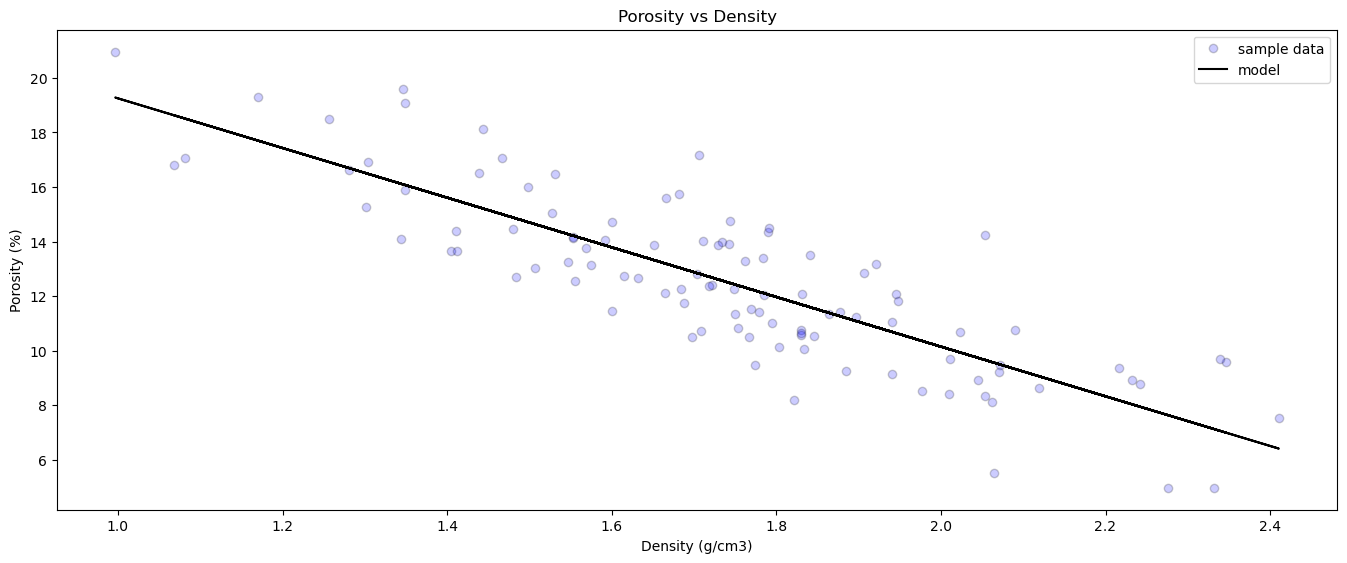

In [7]:
plt.subplot(111)
plt.plot(den, por, 'o', label='sample data', color = 'blue', alpha = 0.2, markeredgecolor = 'black')
plt.plot(den, intercept + slope*den, label='model', color = 'black')
plt.title('Porosity vs Density')
plt.xlabel('Density (g/cm3)')
plt.ylabel('Porosity (%)')
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

Bootstrap
The following code conducts bootstrap for linear regressions on the original dataset. Part of the code is derived from Ali Mirzaei's Linkedin page (https://www.linkedin.com/pulse/linear-regression-bootstrapping-ali-mirzaei). The original dataset comprises 105 data points. 
For bootstrapping, I randomly selected 105 datasets with replacement from the original dataset. In this scenario, I conducted tests with different numbers of bootstrap samples to observe the impact of varying the number of bootstrap iterations on the results.

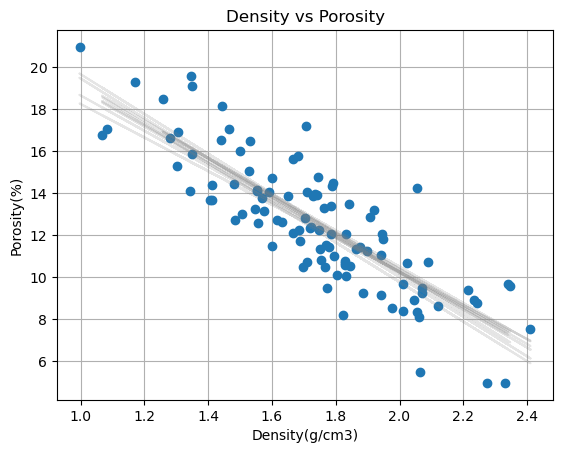

In [8]:
#1. With 10 bootstrap

traning_data = pd.DataFrame({'x': den, 'y': por})

# resample with replacement each row
boot_slopes1 = []
boot_interc1 = []
n_boots = 10
plt.figure()

for _ in range(n_boots):
 # sample the rows, same size, with replacement
 sample_df = traning_data.sample(n=105, replace=True)
 # fit a linear regression
 ols_model_temp = sm.ols(formula = 'y ~ x', data=sample_df)
 results_temp = ols_model_temp.fit()
 
 # append coefficients
 boot_interc1.append(results_temp.params[0])
 boot_slopes1.append(results_temp.params[1])
 
 # plot a greyed out line
 y_pred = ols_model_temp.fit().predict(sample_df['x'])
 plt.plot(sample_df['x'], y_pred, color='grey', alpha=0.2)

# add data points
plt.scatter(den, por)

plt.grid(True)
plt.xlabel('Density(g/cm3)')
plt.ylabel('Porosity(%)')
plt.title('Density vs Porosity')
plt.show()

The number of boostrap may influence the results. In the following two cells, I tested two rounds with different bootstrap number and compare the results. 
First, I increase the number of boosts to 100 and show the plots.

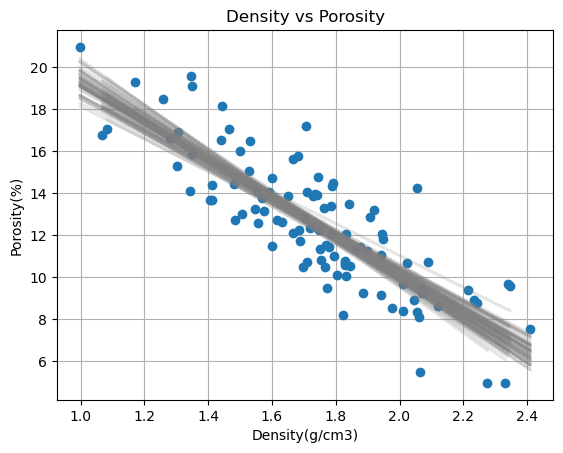

In [9]:
#2. With 100 bootstrap

traning_data = pd.DataFrame({'x': den, 'y': por})

# resample with replacement each row
boot_slopes2 = []
boot_interc2 = []
n_boots = 100
plt.figure()

for _ in range(n_boots):
 # sample the rows, same size, with replacement
 sample_df = traning_data.sample(n=105, replace=True)
 # fit a linear regression
 ols_model_temp = sm.ols(formula = 'y ~ x', data=sample_df)
 results_temp = ols_model_temp.fit()
 
 # append coefficients
 boot_interc2.append(results_temp.params[0])
 boot_slopes2.append(results_temp.params[1])
 
 # plot a greyed out line
 y_pred = ols_model_temp.fit().predict(sample_df['x'])
 plt.plot(sample_df['x'], y_pred, color='grey', alpha=0.2)

# add data points
plt.scatter(den, por)

plt.grid(True)
plt.xlabel('Density(g/cm3)')
plt.ylabel('Porosity(%)')
plt.title('Density vs Porosity')
plt.show()

Next, I keep increase the number of boosts from 100 to 1000 and get the third datasets.

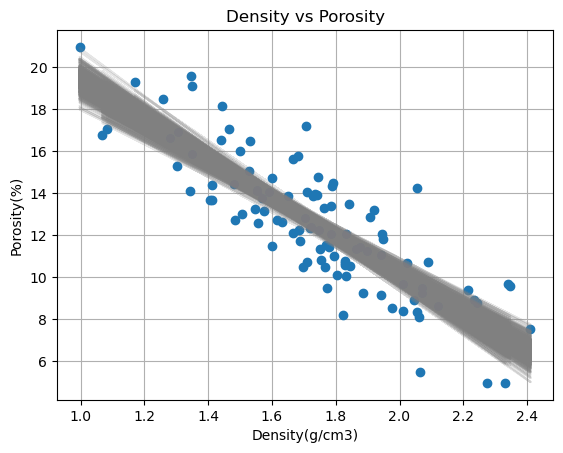

In [10]:
#3. With 1000 bootstrap

traning_data = pd.DataFrame({'x': den, 'y': por})

# resample with replacement each row
boot_slopes3 = []
boot_interc3 = []
n_boots = 1000
plt.figure()

for _ in range(n_boots):
 # sample the rows, same size, with replacement
 sample_df = traning_data.sample(n=105, replace=True)
 # fit a linear regression
 ols_model_temp = sm.ols(formula = 'y ~ x', data=sample_df)
 results_temp = ols_model_temp.fit()
 
 # append coefficients
 boot_interc3.append(results_temp.params[0])
 boot_slopes3.append(results_temp.params[1])
 
 # plot a greyed out line
 y_pred = ols_model_temp.fit().predict(sample_df['x'])
 plt.plot(sample_df['x'], y_pred, color='grey', alpha=0.2)

# add data points
plt.scatter(den, por)

plt.grid(True)
plt.xlabel('Density(g/cm3)')
plt.ylabel('Porosity(%)')
plt.title('Density vs Porosity')
plt.show()

Comparison
We compared the slope and intersection range of different boostrap results.

X:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
X:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
X:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

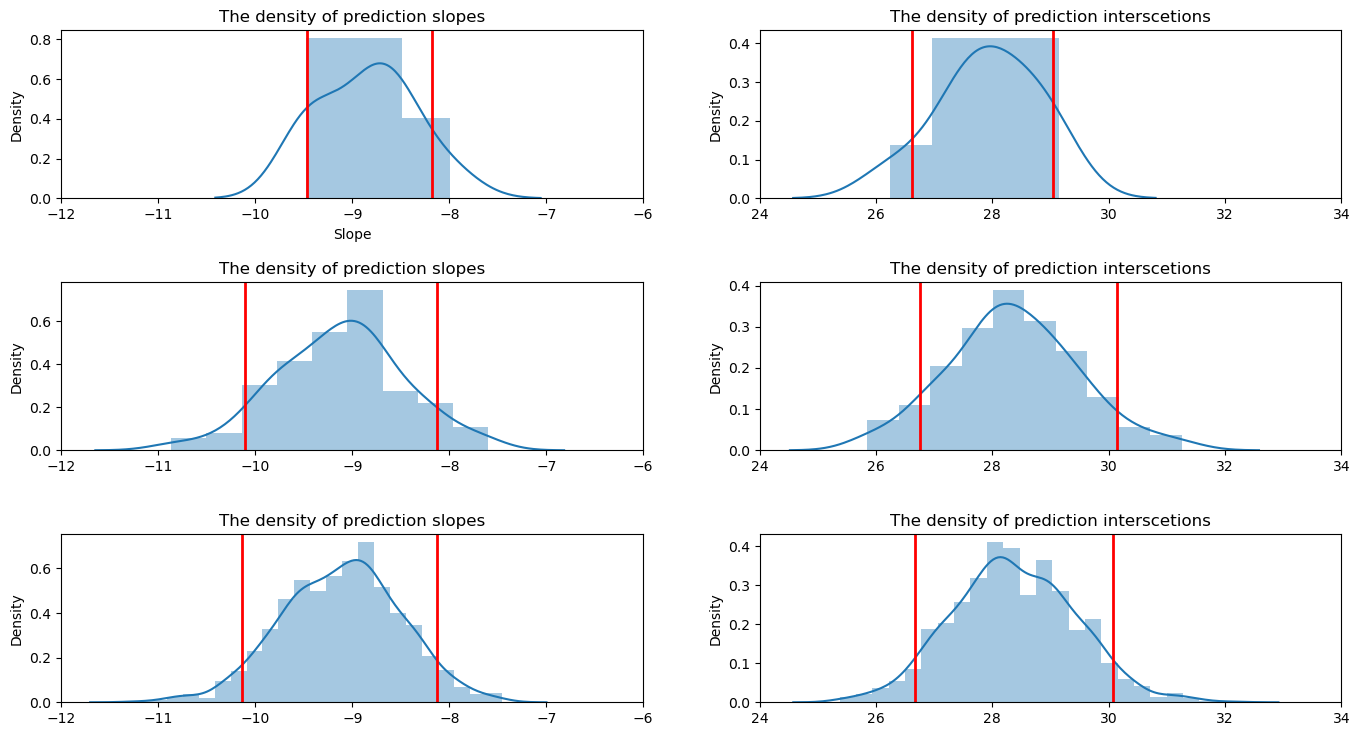

In [18]:
plt.subplot(321)
sns.distplot(boot_slopes1)
plt.axvline(np.percentile(boot_slopes1, 5), color='red', linewidth=2) ;  #Add a vertical line for the 5th percentile
plt.axvline(np.percentile(boot_slopes1, 95), color='red', linewidth=2) ;  #Add a vertical line for the 95th percentile
plt.xlim(-12,-6)
plt.title('The density of prediction slopes')  #Add title for the plot
plt.xlabel('Slope')                            #Add tiitle for the x-axis
plt.ylabel('Intersection')                     #Add title for the y-axis

plt.subplot(322)
sns.distplot(boot_interc1)
plt.axvline(np.percentile(boot_interc1, 5), color='red', linewidth=2) ;  #Add a vertical line for the 5th percentile
plt.axvline(np.percentile(boot_interc1, 95), color='red', linewidth=2) ;  #Add a vertical line for the 95th percentile
plt.xlim(24,34)
plt.title('The density of prediction interscetions')  #Add title for the plot
plt.xlabel('Slope')                                   #Add tiitle for the x-axis
plt.ylabel('Intersection')                            #Add title for the y-axis

plt.subplot(323)
sns.distplot(boot_slopes2)
plt.axvline(np.percentile(boot_slopes2, 5), color='red', linewidth=2) ;  #Add a vertical line for the 5th percentile
plt.axvline(np.percentile(boot_slopes2, 95), color='red', linewidth=2) ;  #Add a vertical line for the 95th percentile
plt.xlim(-12,-6)
plt.title('The density of prediction slopes')  #Add title for the plot
plt.xlabel('Slope')                            #Add tiitle for the x-axis
plt.ylabel('Intersection')                     #Add title for the y-axis

plt.subplot(324)
sns.distplot(boot_interc2)
plt.axvline(np.percentile(boot_interc2, 5), color='red', linewidth=2) ;  #Add a vertical line for the 5th percentile
plt.axvline(np.percentile(boot_interc2, 95), color='red', linewidth=2) ;  #Add a vertical line for the 95th percentile
plt.xlim(24,34)
plt.title('The density of prediction interscetions')  #Add title for the plot
plt.xlabel('Slope')                                   #Add tiitle for the x-axis
plt.ylabel('Intersection')                            #Add title for the y-axis

plt.subplot(325)
sns.distplot(boot_slopes3)
plt.axvline(np.percentile(boot_slopes3, 5), color='red', linewidth=2) ;  #Add a vertical line for the 5th percentile
plt.axvline(np.percentile(boot_slopes3, 95), color='red', linewidth=2) ;  #Add a vertical line for the 95th percentile
plt.xlim(-12,-6)
plt.title('The density of prediction slopes')  #Add title for the plot
plt.xlabel('Slope')                            #Add tiitle for the x-axis
plt.ylabel('Intersection')                     #Add title for the y-axis

plt.subplot(326)
sns.distplot(boot_interc3)
plt.axvline(np.percentile(boot_interc3, 5), color='red', linewidth=2) ;  #Add a vertical line for the 5th percentile
plt.axvline(np.percentile(boot_interc3, 95), color='red', linewidth=2) ;  #Add a vertical line for the 95th percentile
plt.xlim(24,34)
plt.title('The density of prediction interscetions')  #Add title for the plot
plt.xlabel('Slope')                                   #Add tiitle for the x-axis
plt.ylabel('Intersection')                            #Add title for the y-axis


plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.4, wspace=0.2, hspace=0.5); plt.show()

Results

In this workflow, I conducted a linear regression analysis to uncover the relationship between porosity and density. The original dataset solely provided scattered information. Through linear regression, I determined the relationship between porosity and density. Additionally, I employed bootstrap techniques for the linear regression. During the bootstrap process, I randomly selected data with replacement, resulting in multiple realizations. Through these realizations, I calculated the model's uncertainty and conducted optimizations based on these outcomes.


I hope this was helpful,

*Haojun Xia*

___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
